<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/unsupervised_learning/demos/04_dbscan_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Demonstration

Goal:
- Visualize density-based clustering
- Show success on non-spherical data
- Examine epsilon sensitivity
- Demonstrate noise detection
- Show failure on varying densities

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

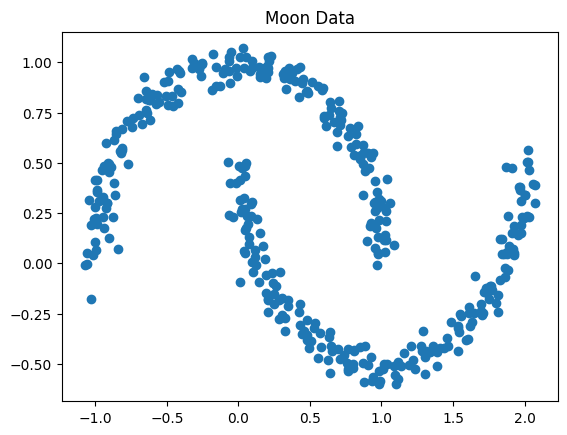

In [2]:
X_moon, _ = make_moons(n_samples=400, noise=0.05, random_state=42)

plt.scatter(X_moon[:,0], X_moon[:,1])
plt.title("Moon Data")
plt.show()

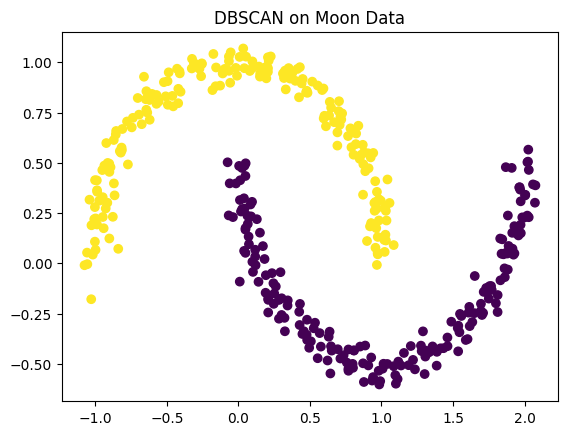

In [3]:
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_moon)

plt.scatter(X_moon[:,0], X_moon[:,1], c=labels)
plt.title("DBSCAN on Moon Data")
plt.show()

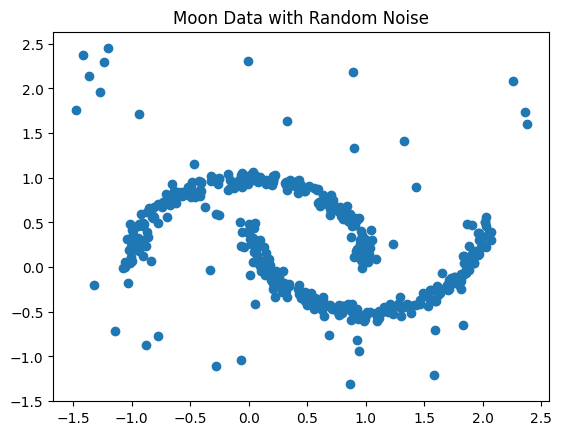

In [4]:
np.random.seed(42)
noise = np.random.uniform(low=-1.5, high=2.5, size=(40,2))
X_noise = np.vstack([X_moon, noise])

plt.scatter(X_noise[:,0], X_noise[:,1])
plt.title("Moon Data with Random Noise")
plt.show()

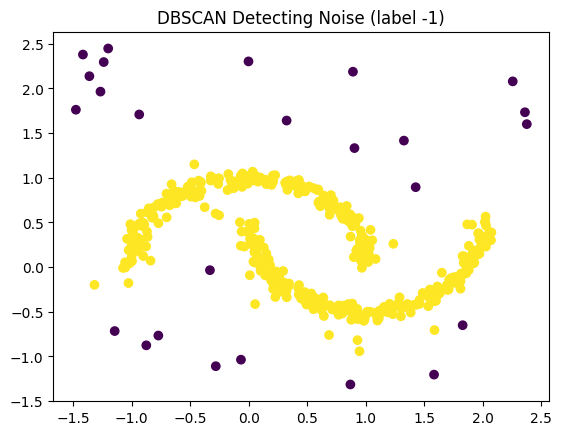

In [5]:
db_noise = DBSCAN(eps=0.3, min_samples=5)
labels_noise = db_noise.fit_predict(X_noise)

plt.scatter(X_noise[:,0], X_noise[:,1], c=labels_noise)
plt.title("DBSCAN Detecting Noise (label -1)")
plt.show()

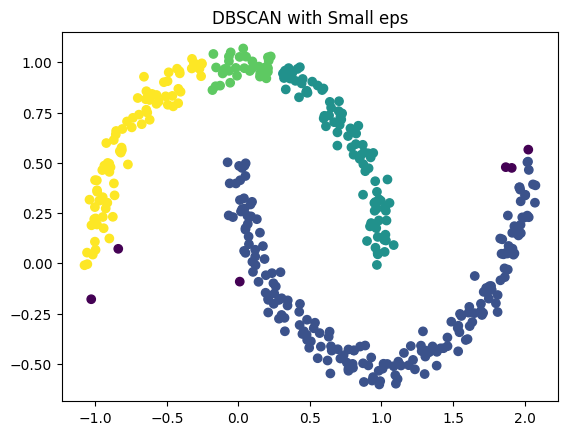

In [6]:
db_small = DBSCAN(eps=0.1, min_samples=5)
labels_small = db_small.fit_predict(X_moon)

plt.scatter(X_moon[:,0], X_moon[:,1], c=labels_small)
plt.title("DBSCAN with Small eps")
plt.show()

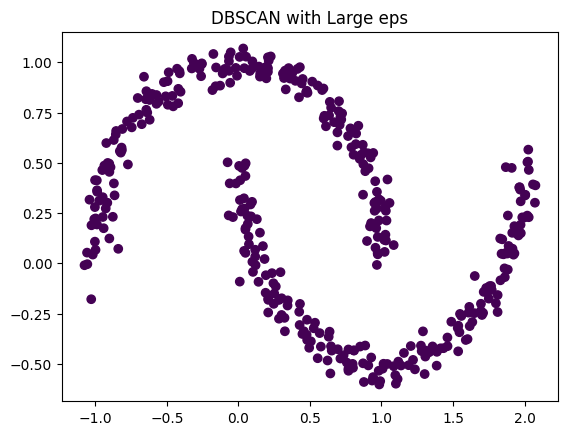

In [7]:
db_large = DBSCAN(eps=0.8, min_samples=5)
labels_large = db_large.fit_predict(X_moon)

plt.scatter(X_moon[:,0], X_moon[:,1], c=labels_large)
plt.title("DBSCAN with Large eps")
plt.show()

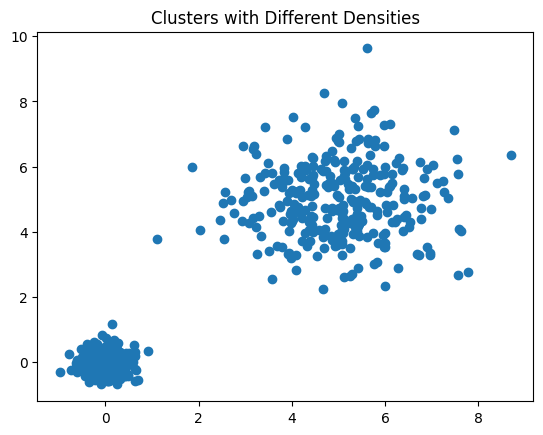

In [8]:
X_dense, _ = make_blobs(n_samples=300, centers=[[0,0]], cluster_std=0.3, random_state=42)
X_sparse, _ = make_blobs(n_samples=300, centers=[[5,5]], cluster_std=1.2, random_state=42)

X_vary = np.vstack([X_dense, X_sparse])

plt.scatter(X_vary[:,0], X_vary[:,1])
plt.title("Clusters with Different Densities")
plt.show()

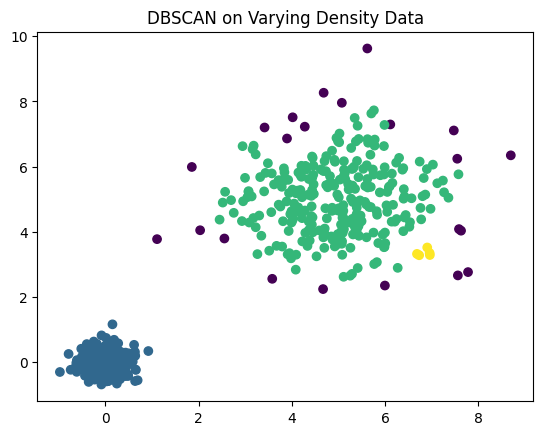

In [9]:
db_vary = DBSCAN(eps=0.5, min_samples=5)
labels_vary = db_vary.fit_predict(X_vary)

plt.scatter(X_vary[:,0], X_vary[:,1], c=labels_vary)
plt.title("DBSCAN on Varying Density Data")
plt.show()

Observations:

1. DBSCAN captures non-spherical shapes.
2. It detects noise explicitly (label -1).
3. Epsilon critically controls cluster expansion.
4. Too small eps → fragmentation.
5. Too large eps → cluster merging.
6. Varying densities break single-epsilon assumption.

DBSCAN defines clusters as dense regions separated by sparse gaps.